In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import datetime as dat
from scipy.stats import mode

In [3]:
# 1. Fetch historical data
crypto = 'BTC-USD' 
end = dat.datetime.now()
start = end - dat.timedelta(days=2*365)  # Fetch data for the last year
data = yf.download(tickers = crypto, start=start, end=end, interval='1d')


C:\Users\mpjau\AppData\Local\Temp\ipykernel_14088\1075568794.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers = crypto, start=start, end=end, interval='1d')
[*********************100%***********************]  1 of 1 completed


In [4]:
# Inspect the data
data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-06-16,26327.462891,26463.173828,25245.357422,25575.283203,16324646965
2023-06-17,26510.675781,26769.394531,26174.492188,26328.679688,11090276850
2023-06-18,26336.212891,26675.925781,26325.890625,26510.457031,9565695129
2023-06-19,26851.029297,26984.611328,26312.832031,26335.441406,12826986222
2023-06-20,28327.488281,28388.968750,26668.791016,26841.664062,22211859147


In [5]:
# 2. Calculate log returns
data['Log Returns'] = np.log(data['Close'] / data['Close'].shift(1)) # assuming log returns are normally distributed

In [6]:
# 3. Estimate the parameters
mu = data['Log Returns'].mean()  # Mean of returns
sigma = data['Log Returns'].std()  # Standard deviation of returns

In [7]:
# 4. Monte Carlo Simulation initical conditions
S0 = data['Close']['BTC-USD'].iloc[365]  # Starting price (current price)
T = 365  # Number of days to simulate
simulations = 1000  # Number of simulations
dt = 1  # Time step (1 day)
np.random.seed(42)  # For reproducibility
print(S0)

66191.0


In [8]:
# 5. Run Monte Carlo Simulation
simulated_prices = np.zeros((T, simulations))
simulated_prices[0] = S0

In [9]:
for t in range(1, T):
    Z = np.random.standard_normal(simulations)  # Random numbers from standard normal
    simulated_prices[t] = simulated_prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z) # Discrete Geometric Brownian Motion formula

In [10]:
simulated_pricesdf = pd.DataFrame(simulated_prices)

In [11]:
simulated_pricesdf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,...,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000,66191.000000
1,67135.362897,66063.986092,67392.642857,68903.888099,65903.688504,65903.715916,69002.035312,67597.406876,65511.949350,67213.386231,...,66646.734793,62953.689958,65881.946317,65160.185229,64634.651106,65825.349315,69385.022343,67380.955623,65343.363063,67264.529886
2,69668.323122,67736.928977,67601.405145,67891.080164,67186.078576,66669.391507,70696.628213,68802.760299,67383.833621,66413.107251,...,68119.709498,64269.906771,68004.081151,66445.075054,65315.983291,67741.529285,69448.209782,65996.540641,65177.007221,66111.528470
3,68595.181615,67596.236822,66362.690477,67470.106960,64140.344025,67136.772567,70810.734074,67499.832927,68627.222469,68117.212358,...,70899.726699,65361.169388,68236.181994,66193.451457,63860.570497,67982.109128,70013.888242,64053.875264,65835.242019,65956.262715
4,65462.025603,66243.454394,65774.912789,70887.303567,65154.149812,65006.008568,71801.581189,65007.743371,70647.407758,67415.582110,...,68037.113648,64687.699364,65007.860583,67571.939730,60701.321527,68138.862676,66528.770362,63636.803366,68742.828250,66667.062916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,329218.779762,197003.724450,88118.875834,165197.325755,152044.714660,67953.631893,207766.715093,133309.373297,108530.524342,192738.147551,...,144444.211168,89841.256694,180946.206243,212975.231436,282651.239532,109219.182163,142715.600917,83390.136253,144588.713912,76773.530236
361,330390.975075,196796.298501,87841.371261,159705.987437,150765.333307,69071.335601,205175.078087,134028.774880,113714.664862,204793.373951,...,145041.400585,93261.130199,193675.925453,216441.799872,293083.886207,107370.843564,146550.633340,81000.929788,142949.190421,74773.958792
362,328163.853113,192944.412149,86232.339912,155891.464474,158733.528691,69412.984141,205156.200325,133730.946761,114764.725422,200434.554678,...,148588.633208,98087.926213,196160.664821,211588.070367,294305.295317,108518.981714,146935.869140,84796.242853,152380.140537,74606.003391
363,332887.305385,193874.123413,88185.937995,156766.850178,158662.356182,71450.905663,198206.620664,133916.641037,118414.153055,204749.067623,...,156540.932431,102551.129947,196606.989481,211706.149729,300561.874587,107224.137340,147387.599805,83520.388444,159516.956384,74585.299765


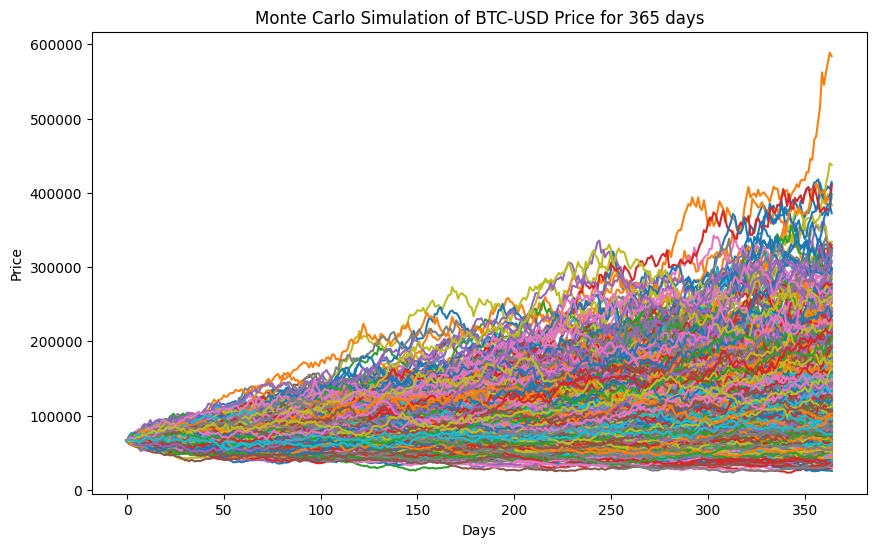

In [12]:
# 6. Plot the simulation results
plt.figure(figsize=(10,6))
plt.plot(simulated_prices)
plt.title(f"Monte Carlo Simulation of {crypto} Price for {T} days")
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()

In [13]:
# 7. Analyze the results (e.g., mean, quantiles)
final_prices = simulated_prices[-1]
mean_price = np.mean(final_prices)
quantiles = np.percentile(final_prices, [5, 50, 95])

In [14]:
print(f"Mean simulated price after {T} days: {mean_price}")
print(f"5th percentile: {quantiles[0]}, Median: {quantiles[1]}, 95th percentile: {quantiles[2]}")
print(np.std(final_prices))
print(f"Expected return after one year {mean_price/S0}")

Mean simulated price after 365 days: 131859.28598705278
5th percentile: 52198.99850759533, Median: 118294.66870891373, 95th percentile: 259476.7928361824
66365.73957465736
Expected return after one year 1.9921029443134681


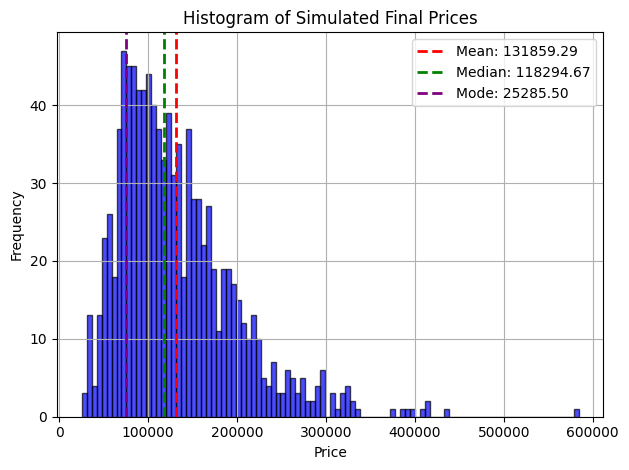

In [26]:
mean_val = np.mean(final_prices)
median_val = np.median(final_prices)
counts, bins = np.histogram(final_prices, bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
hist_mode = bin_centers[np.argmax(counts)]

plt.hist(final_prices, bins = 100, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.axvline(hist_mode, color='purple', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f}')

plt.title('Histogram of Simulated Final Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
def kurtosis_skew(X):
    mean = np.mean(X)
    std = np.std(X)
    N= len(X)
    oneoverN=1/len(X)
    aK=0
    bK=0
    aS=0
    for x in X:
        aK += (x-mean)**4
        bK += (x-mean)**2
        aS += (x-mean)**3
    bK = (oneoverN * bK)**2
    return oneoverN*aK/bK, aS/((N-1)*std**3)


In [17]:
kurt, skew = kurtosis_skew(final_prices)
print(f"Mean: {np.mean(final_prices)}, STD: {np.std(final_prices)}, Kurtosis: {kurt}, Skewness: {skew}")

Mean: 131859.28598705278, STD: 66365.73957465736, Kurtosis: 6.822684018670231, Skewness: 1.468091495382705


In [18]:
simulated_row_avg = simulated_pricesdf.mean(axis=1)
simulated_row_std = simulated_pricesdf.std(axis=1)

real_prices = data['Close'][366:].values

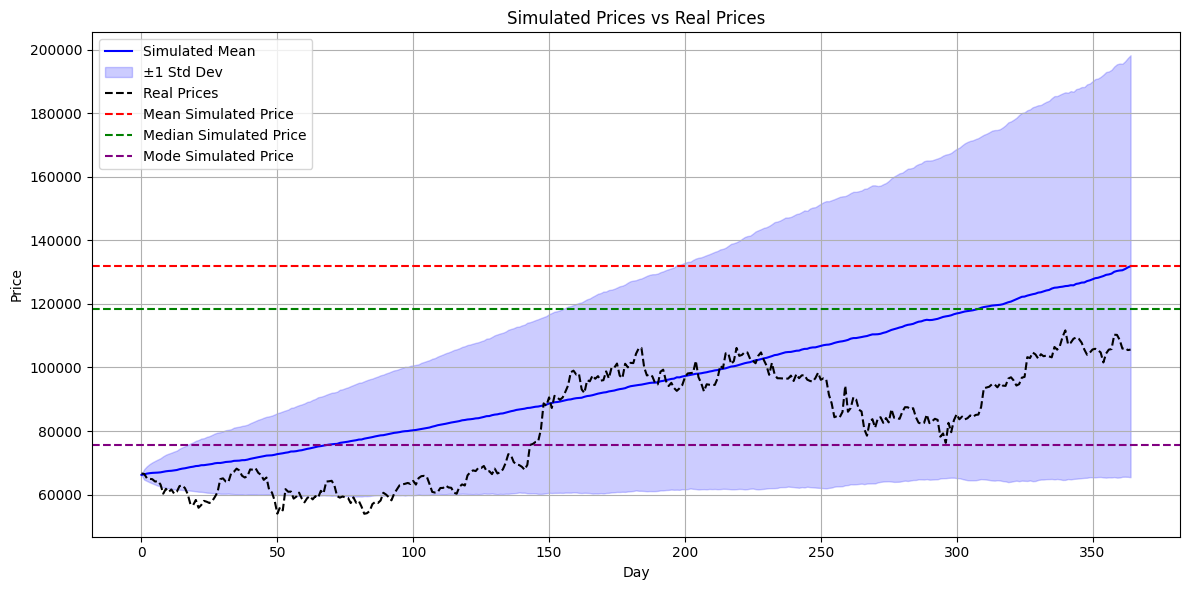

In [27]:
days = np.arange(365)

plt.figure(figsize=(12, 6))

# Plot simulated mean
plt.plot(days, simulated_row_avg, label='Simulated Mean', color='blue')

# Shaded area for ±1 std dev
plt.fill_between(days,
                 simulated_row_avg - simulated_row_std,
                 simulated_row_avg + simulated_row_std,
                 color='blue', alpha=0.2, label='±1 Std Dev')

# Plot real prices
plt.plot(days, real_prices, label='Real Prices', color='black', linestyle='--')
plt.axhline(y=mean_val, color='red', linestyle='--', label='Mean Simulated Price')
plt.axhline(y=median_val, color='green', linestyle='--', label='Median Simulated Price')
plt.axhline(y=hist_mode, color='purple', linestyle='--', label='Mode Simulated Price')

# Labels and legend
plt.title('Simulated Prices vs Real Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()